# Análisis matemático con python

## Cálculo diferencial


### que vamos a hacer ??

Vamos a usar python y algunas librerias, les voy a dar un enfoque al análisis matematico, en el cálculo diferencial, una herrmamiento que me parecio bastante útil desde mi punto de vista.

Primero vamos a ver funciones de una variable $f: \mathbb{R} \rightarrow \mathbb{R} $
las aplicacones de estas seran limites, continuidad, derivada y polinomio de Taylor. 


Luego funciones de varias variables, campos escalares $f: \mathbb{R^2} \rightarrow \mathbb{R} $
con su aplicacion a limites, continuidad, diferenciabilidad y su plano tangente.

Antes que todo vamos a ver lirberias de python con el fin de facilitar el cálculo numerico, simbologia matematica y graficar funciones . 

Mi objetivo es facilitar una herramienta y fomentar la programacion orientada al calculo para facilitar su entendimiento.

Advertencia :


¡¡ este archivo no quiere reemplazar a ninguna clase en cualquiera de sus modalidades presenciales, ni virutales
tampoco ningun trabajo practico, ejercicio ni parcial o examen !!

Simplemente es otro punto de vista del conocimiento con la aplicacion de una nueva herramienta.

## Contenido 

### 1. Introduccion
#### a. Librerias
#### b. versiones
#### c. Ejemplo numpy 
#### d. Ejemplo simpy
#### e.  Ejemplo de matplotlib + funciones en python 
 
### 2. Limite , continuidad y derivada 

### 3. Polinomio de Taylor

### 4. Límite y continuidad para una función multivariable

### 5. Gradiente de una funcion

### 6. Difenciabilidad

### 7. Plano tangente


# 1. Introduccion 

### a. Librerias 

In [1]:
# para cálculo 
import numpy as np

from sympy import * 
import sympy as sym

# para graficar 

import matplotlib.pyplot as plt
import matplotlib as mtl

from matplotlib import cm 
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import Axes3D

### b. Versiones 

In [2]:
sym.__version__

'1.5.1'

In [3]:
np.__version__

'1.18.1'

In [4]:
mtl.__version__

'3.1.3'

### c. Ejemplo numpy

Numeric python para análisis numerico 


In [5]:
# con arange podemos tener un vector de valores igualmente espaciado  
np.arange(0,10, 2)

array([0, 2, 4, 6, 8])

In [6]:
t= np.arange(0,10, 2)
len(t)

5

In [7]:
# con linspace podemos especificar la cantidad de valores que queresmos, en vez del salto entre valores  
np.linspace(0,10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [8]:
t= np.linspace(0,10, 5)
len(t)

5

In [9]:
# numero e 
np.exp(1)

2.718281828459045

In [10]:
# podemos utilizar matrices, como la matriz identidad
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### d. Ejemplo sympy


In [11]:
# tipografia de Sympy para matematica simbolica
init_printing(use_latex='mathjax')

In [12]:
# creamos variable 'x' y funcion 'f(x)' 
x = symbols("x")
f = cos(x)
f

cos(x)

In [13]:
# valor de la funcion en un punto
f.subs(x,pi)

-1

In [14]:
# con sympy podemos armar una funcion a trozos 

x = symbols("x")

f = x**2
g = E**x
h = -20

p = Piecewise( (h, x<1), (f, x>=5), (g,  True) )
p

⎧-20  for x < 1
⎪              
⎪ 2            
⎨x    for x ≥ 5
⎪              
⎪ x            
⎩ℯ    otherwise

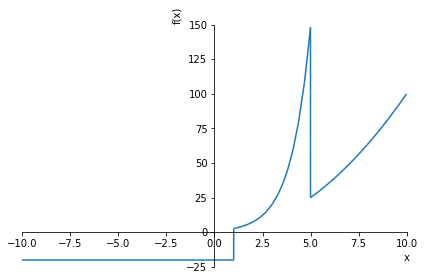

In [15]:
# graficamos funcion a trozos con sympy

from sympy.plotting import plot 

plot(p)

### e.  Ejemplo de matplotlib + funciones en python 

In [16]:
# con Python podemos definir una funcion espefica
# en este ejemplo podemos construir una funcion y su tangente ayudandonos con numpy

def cuadrado(x):
    return x**2

def tangente(px, n):
    # recta en el punto px entre los valores px-n y px+n
    x_tg = np.linspace(px-n, px+n)
    y_tg = cuadrado(px) + (2*px)*(x_tg - px)   # pendiente = f' 
    
    return x_tg, y_tg

def normal(px, n):
    x_n = np.linspace(px-n, px+n)
    y_n = cuadrado(px) -1/(2*px) *(x_n - px)   # pendiente = -1 / f' 
    
    return x_n, y_n

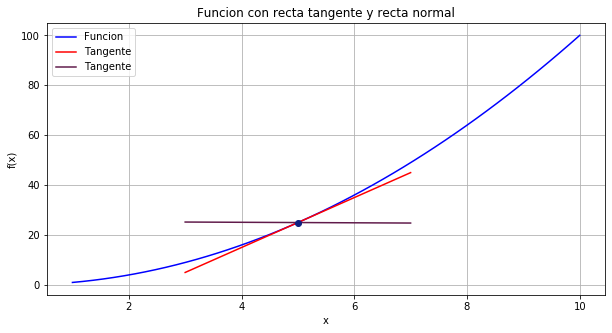

In [17]:
plt.figure(figsize=(10,5))

x = np.linspace(1,10)
y = cuadrado(x)    
plt.plot(x, y, 'b', label='Funcion')

# elegimos punto de análisis
punto= 5

# creamos recta tangente
tg = tangente(punto,2)
plt.plot(tg[0], tg[1], 'r', label= 'Tangente')

# creamos recta normal
n = normal(punto,2)
plt.plot(n[0], n[1], color='#601a4a', label= 'Tangente')

# graficamos punto de análisis
plt.plot(punto,cuadrado(punto), color='#0f2080',marker='o')

# parametros de matplotlib para graficar
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funcion con recta tangente y recta normal')

plt.grid(True)
plt.show()

In [18]:
# no se puede ver la perpendicularidad entre la tangente y la normal por la escala de los ejes

# 2. Limite , continuidad y derivada


Vamos a usar $\LaTeX$ para escribir expresiones matemáticas.

Recodamos ... 

#### Limite
El limite de f(x) conforme x s aproxima al punto a es L 

$  \lim\limits_{x \to a}{f(x)}
= L \iff \forall \epsilon > 0  ,$
$\exists  \delta >0 \mid \forall x \in Dom(f) ,$
$ 0 < |x-a| < \delta  \rightarrow < |f(x) -L| < \epsilon$


#### Continuidad
una funcion es continua en el punto a si solos si :

1) $\exists f(a) $ 

2) $ \exists \lim\limits_{x \to a}{f(x)}$

3) $ \lim\limits_{x \to a}{f(x)} = F(x)$

#### Derivada

$ f'(x) = \lim\limits_{x \to xo}{ \frac{f(x) - f(xo)}{x - x0 }  } $


In [19]:
# limites con sympy 

# mostramos la expresion

x = symbols("x")
f = sin(x)/Abs(x)

Limit(f, x , 0, '+')

     ⎛sin(x)⎞
 lim ⎜──────⎟
x─→0⁺⎝ │x│  ⎠

In [20]:
# realizamos el cálculo del límite

limit(f , x , 0,'+')

1

In [21]:
limit(f , x , 0,'-')

-1

In [22]:
Limit(1/x, x, 0, '+')

     1
 lim ─
x─→0⁺x

In [23]:
limit(1/x, x, 0, '+')

∞

In [24]:
# la gran vetaja de sympy podemos derivar una funcion

x = symbols('x')
f = sqrt(x**2)
f

   ____
  ╱  2 
╲╱  x  

In [25]:
f.diff(x)
# la funcion es continua pero en x=0 no es derivable 

   ____
  ╱  2 
╲╱  x  
───────
   x   

In [26]:
f.diff(x).limit(x,0,'+')

1

In [27]:
f.diff(x).limit(x,0,'-')

-1

In [28]:
x = symbols("x")
f = E**(-1/x)
f

 -1 
 ───
  x 
ℯ   

In [29]:
Limit(f,x,'+oo')

     -1 
     ───
      x 
lim ℯ   
x─→∞    

In [30]:
limit(f,x,'+oo')

1

In [31]:
diff(f,x)

 -1 
 ───
  x 
ℯ   
────
  2 
 x  

In [32]:
Limit(f.diff(x), x , '+oo')

    ⎛ -1 ⎞
    ⎜ ───⎟
    ⎜  x ⎟
    ⎜ℯ   ⎟
lim ⎜────⎟
x─→∞⎜  2 ⎟
    ⎝ x  ⎠

In [33]:
f.diff(x).limit(x,'+oo')

0

# 3. Polinomio de Taylor 

Polinomio de taylor para aproximar un funcion a un polinomio de grado n

dada $ f(x) $
su pol. de Taylor sera $ P(x) = f(a) + f'(a)(x-a) + \frac{1}{2!} f''(a)(x-a)^2 + ... + \frac{1}{n!} f^n(a)(x-a)^n $ 

con un termino de resto que acota el error $ R(x) = \frac{1}{(n+1)!} f^{n+1}(a)(x-a)^{n+1} $

In [34]:
# Podemos generar su polinomio de grado 3 en x0=1
x = symbols("x")

series(E**x, x, x0=1, n=3).removeO()

         2                
ℯ⋅(x - 1)                 
────────── + ℯ⋅(x - 1) + ℯ
    2                     

In [35]:
# Polinomio de McLaurin de grado 3

series(E**x, x, x0=0, n=3).removeO()

 2        
x         
── + x + 1
2         

In [36]:
series(E**x, x, x0=0, n=3).removeO().subs(x,0)

1

In [37]:
# polinomio de grado 5

series(E**x, x, x0=1, n=5).removeO()

         4            3            2                
ℯ⋅(x - 1)    ℯ⋅(x - 1)    ℯ⋅(x - 1)                 
────────── + ────────── + ────────── + ℯ⋅(x - 1) + ℯ
    24           6            2                     

In [38]:
series(cos(x), x, x0=1, n=5).removeO()

       4                 3                 2                                 
(x - 1) ⋅cos(1)   (x - 1) ⋅sin(1)   (x - 1) ⋅cos(1)                          
─────────────── + ─────────────── - ─────────────── - (x - 1)⋅sin(1) + cos(1)
       24                6                 2                                 

## Graficamos la funcion a analizar y su polinomio



creamos un array de numpy con los valores de la funcion para graficar

con sympy hacemos la funcion y los polinomios de Taylor

podemos graficar todo con matplotlib

In [39]:
x = symbols('x')
f = cos(x) # podemos analizar cualquier funcion con sympy

# creamos un linspace de x para graficar
x_funcion= np.linspace(-np.pi, np.pi, 20) # entre los puntos -pi y pi con 50 puntos para graficar

# punto (a,f(a))
a = np.pi/4
f_a = f.subs(x,a)

w, q =[], [] # variables auxiliares

# creamos un linspace con numpy de f(x)
for i in range(len(x_funcion)):
    w = f.subs(x,x_funcion[i]) 
    q.append(float(w))
    
y_funcion = np.asarray(q, dtype=np.float32)

# vamos a ver los polinomios de grado 2, 5 y 7
# creamos linspace con valores para cada grado.
p = {2:[], 5:[], 7:[]} # dict vacio de python 

for key in p : # llenamos el dict con los valores 
    w, q =[], []

    for i in range(len(x_funcion)): 
        w = series(f, x, x0=a, n=key).removeO().subs(x,x_funcion[i]) 
        q.append(float(w))
        
    p[key] = np.asarray(q, dtype=np.float32)


## Grafico 

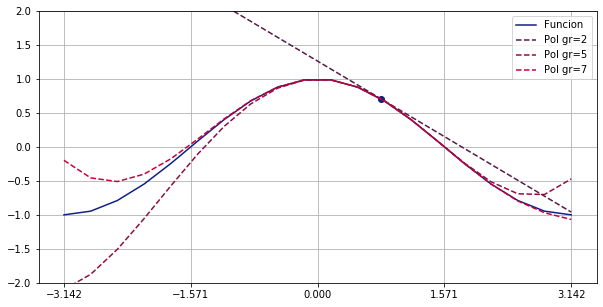

In [40]:
plt.figure(figsize=(10,5))

plt.plot(x_funcion , y_funcion , label='Funcion', color='#0f2080')
plt.plot(a, f_a, 'o', color='#0f2080')

plt.plot(x_funcion , p[2] , label='Pol gr=2' , ls='--', color='#581845')
plt.plot(x_funcion , p[5] , label='Pol gr=5' , ls='--', color='#900c3f')
plt.plot(x_funcion , p[7] , label='Pol gr=7' , ls='--', color='#c70039')


plt.xticks(ticks= np.arange(-np.pi, 1.5*np.pi, np.pi/2) )
plt.ylim(-2,2)
plt.grid(True)
plt.legend()
plt.show()         

# 4. Límite y continuidad para una función multivariable

para cálculo multivariable recordamos ...

### Limite
El limite de f(x,y) conforme (xo,yo) se aproxima al punto a es L 

$  \lim\limits_{(x,y) \to (x0,y0)}{f(x,y)}
= L \iff \forall \epsilon > 0  ,$
$\exists  \delta >0 \mid \forall (x,y) \in Dom(f) ,$


$ 0 < \sqrt{(x-xo)^2 + (y-yo)^2}  < \delta $ 

$  \rightarrow  |f(x,y) -L| < \epsilon \ $ 



### Continuidad
una funcion es continua en el punto a si solos si :

1) $\exists f(xo,yo) $ 

2) $ \exists \lim\limits_{(x,y) \to (xo,yo)}{f(x,y)}$

3) $ \lim\limits_{(x,y) \to (xo,yo)}{f(x,y)} = f(x,y)$


In [41]:
# ejemplo 1 Funcion continua

In [42]:
# indicamos variables 'x' e 'y' y luego la funcion f(x,y)

x , y = symbols('x y')
f = (x**2) + (y**2)
f

 2    2
x  + y 

In [43]:
# valor de f en un punto (1,1)

f.subs(x,1).subs(y,1)

2

In [44]:
Limit(f,x,1)

     ⎛ 2    2⎞
 lim ⎝x  + y ⎠
x─→1⁺         

In [45]:
limit(f, x, 1)

 2    
y  + 1

In [46]:
L = Limit(f,x,1)
L

     ⎛ 2    2⎞
 lim ⎝x  + y ⎠
x─→1⁺         

In [47]:
Limit(L, y, 1,'+')

          ⎛ 2    2⎞
 lim  lim ⎝x  + y ⎠
y─→1⁺x─→1⁺         

In [48]:
f.limit(x , 1,'+').limit(y, 1,'+')

2

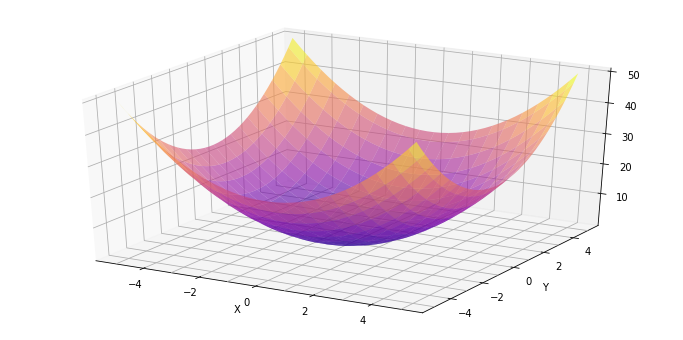

In [49]:
t = np.linspace(-5, 5, 40) 
x , y = np.meshgrid(t,t)
z = (x**2 + y**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.6)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

plt.show()

In [50]:
# ejemplo 2 Funcion con discontinuidad en (0,0)

In [51]:
x , y = symbols('x y')
f = (x*y) /(x**2 + y**2)
f

  x⋅y  
───────
 2    2
x  + y 

In [52]:
# limite con y=0 
f.limit(y,0).limit(x,0)

0

In [53]:
# limite con y=x 
f.limit(y,x)#.limit(x,0)

1/2

In [54]:
#podemos hacer un limite radial reemplazan x=rcos(t) , y=rsen(t) 
r  = symbols('r')
t = Symbol(r'\theta')
x = r*cos(t)
x

r⋅cos(\theta)

In [55]:
f.subs(x,r*cos(t)).subs(y,r*sin(t))

  r⋅x⋅sin(\theta)   
────────────────────
 2    2            2
r ⋅sin (\theta) + x 

In [56]:
# realizamos el limite de r hacia 0, buscamos si en alguna direccion no depende del radio
# hay una curva que pasa por el punto, con direccion theta en la cual la funcion no tiene el mismo limite
# si por dos direcciones diferentes no tenemos el mismo limite, este lim no existe

f.subs(x,r*cos(t)).subs(y,r*sin(t)).limit(r,0)

0

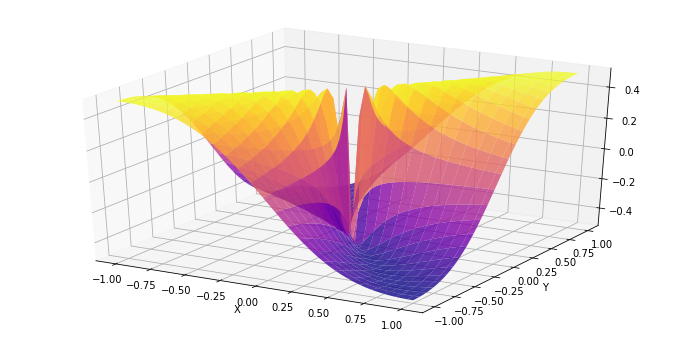

In [57]:
t = np.linspace(-1, 1, 50) 
x , y = np.meshgrid(t,t)
z = (x*y) /(x**2 + y**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

plt.show()

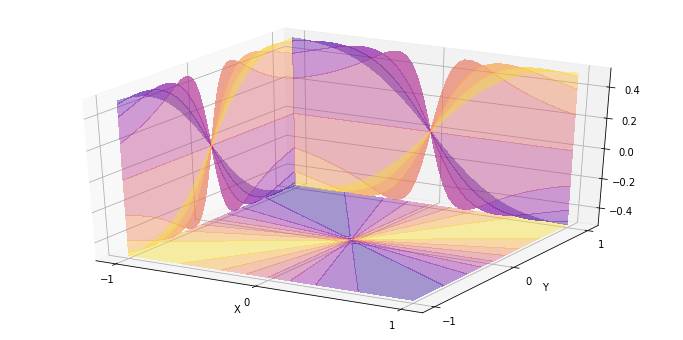

In [58]:
# Proyecciones de la funcion en los planos 

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

# Proy en plano xy
cset = ax.contourf(x, y, z, zdir='z', offset=np.min(z), cmap=cm.plasma, alpha=0.4)

# Proy en plano yz
cset = ax.contourf(x, y, z, zdir='x', offset=min(t), cmap=cm.plasma, alpha=0.4)

# Proy en plano xz
cset = ax.contourf(x, y, z, zdir='y', offset=max(t), cmap=cm.plasma, alpha=0.4)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1))
ax.set_yticks(np.arange(min(t),max(t)+1))

plt.show()

# 5. Gradiente de una funcion

#### Derivabilidad

para un campo escalar $\vec f$  funcion $f(x,y)$ en el punto $ \vec a $ en una direccion  $ \vec xi $

$ \large \frac{ \partial f(a)}{ \partial x_i} = \lim\limits_{h \to o}{ \frac{f(a_1,...,a_i + h,..., a_n) - f(a_1,..., a_n) }{h}}$ 


#### Gradiente



$ \nabla{ f(x,y) } = \large \frac{\partial f}{ \partial{x} } \hat{i} 
+ \frac{\partial f}{ \partial{y} } \hat{j}$

In [59]:
x , y = symbols('x y')
f = (x**2) + (y**2)
f

 2    2
x  + y 

In [60]:
# armamos el gradiente en forma de matriz
Matrix([ f.diff(x) , f.diff(y) ])  

⎡2⋅x⎤
⎢   ⎥
⎣2⋅y⎦

In [61]:
diff(f,x)

2⋅x

In [62]:
h = symbols('h')

Fx = (f.subs(x, x+h) - f)/(h) 

Limit(Fx,h,0 )

     ⎛   2          2⎞
     ⎜- x  + (h + x) ⎟
 lim ⎜───────────────⎟
h─→0⁺⎝       h       ⎠

In [63]:
limit(Fx,h,0)

2⋅x

In [64]:
# valor de la derivada en x en el punto 1,1
x0,y0 = 1,1
diff(f,x).subs(x,x0).subs(y,y0)

2

## Hessiano de una funcion


$ \mathcal{H} f =  \large  \begin{pmatrix}{ \frac{\partial^2{f}}{\partial{x^2}}  }&{ \frac{\partial^2{f}}{\partial{x} \partial{y}} }\\{ \frac{\partial^2{f}}{\partial{y} \partial{x}} }&{ \frac{\partial^2{f}}{\partial{y^2}} }\end{pmatrix} $


In [65]:
H = Matrix([ [f.diff(x).diff(x), f.diff(x).diff(y)],
             [f.diff(y).diff(x), f.diff(y).diff(y)] ])
H

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

In [66]:
# con el determinando del hessiano podemos saber si el punto es un punto critico o silla 
H.det()

4

# 6. Difenciabilidad

para una variable f(x) = y se tiene el diferencial $ \delta y = f'(x) \Delta x + \epsilon \Delta x  $

en un punto $ \Delta f(x_o) = f'(x_o) \Delta x + \epsilon \Delta x $

$ \frac{\Delta y}{\Delta x}$ difiera de $f'(x)$ en un numero pequeño $\epsilon$ que depende de $\Delta x $

$\epsilon$  es funcion de $\Delta x$ ... cuando $\Delta x \rightarrow 0$ ... entonces $\Delta \epsilon \rightarrow 0$

para un fun. multivariable $f(x,y)$ con difencial 
$ \Delta f(x_o,y_o) = f(x_o + \Delta x , y_o + \Delta y ) -f(x_o,y_o)$ 


$\Delta f(x_o,y_o) =  f'_x(x_o,y_o) \Delta x + f'_y(x_o,y_o) \Delta y  +\epsilon _1 \Delta x + \epsilon _2 \Delta y $

tenemos ....

$f(x_o + \Delta x , y_o + \Delta y ) -f(x_o,y_o) = f'_x(x_o,y_o) \Delta x + f'_y(x_o,y_o) \Delta y  +\epsilon _1 \Delta x + \epsilon _2 \Delta y  $

...

$f(x_o + \Delta x , y_o + \Delta y )  = f'_x(x_o,y_o) \Delta x + f'_y(x_o,y_o) \Delta y  +\epsilon _1 \Delta x + \epsilon _2 \Delta y  +f(x_o,y_o)  $

...

$f(x_o + \Delta x , y_o + \Delta y )  = f(x_o,y_o) + f'_x(x_o,y_o) \Delta x + f'_y(x_o,y_o) \Delta y  +\epsilon _1 \Delta x + \epsilon _2 \Delta y   $

Donde $\epsilon _1 y \epsilon _2 $ son funciones de $\Delta x, \Delta y $ , tales que $ \epsilon _1 \rightarrow 0 $ y $ \epsilon _2 \rightarrow 0 $  cuando  $ \Delta x \rightarrow 0  , \Delta y \rightarrow 0 $



Entonces ....

$f(x,y)$ es diferenciable en un punto $(x_o,y_o)$ si existe transformacion lineal T que cumple :
$ f(x_o + h) = f(x_o) + T(h) + \theta (h) $ 

con $ T(h) = \frac{\partial }{ \partial x}f(x_o,y_o) \dot (x-x_o) + \frac{\partial }{ \partial y}f(xo,yo)*(y-yo) $ 

donde:

$ \large \lim\limits_{h \to 0}{ \frac{||\theta (h)||}{||h||}} = 0 $

entonces:

$ \large \lim\limits_{h \to 0}{ \frac{||f(x_o + h) - f(x_o) - T(h)||}{||h||}} = 0 $


si una funcion es diferenciable es continua y derivable en el punto ... pero el reciproco no vale 


$ \large \lim\limits_{(x,y) \to (0,0)}{ \frac{f(x,y) - f(x_o,y_o) - f'_x (x_o,y_o)(x-x_o) - f'_y (x_o,y_o)(y-y_o) }{\sqrt{(x-x_o)^2 +(y-y_o)^2 } }} = 0 $


In [67]:
x , y = symbols('x y')
f = E**(x+y)
f

 x + y
ℯ     

In [68]:
x0,y0 =0,0

f_x0y0 = f.subs(x,x0).subs(y,y0)  

f_x = f.diff(x).subs(x,x0).subs(y,y0)
f_y = f.diff(y).subs(y,y0).subs(x,x0)

F = (f -f_x0y0 -f_x*(x-x0) -f_y*(y-y0) ) / sqrt((x-x0)**2 + (y-y0)**2)

F

          x + y    
-x - y + ℯ      - 1
───────────────────
       _________   
      ╱  2    2    
    ╲╱  x  + y     

In [69]:
l = Limit(F,x,x0)
Limit(l,y,y0) 

          ⎛          x + y    ⎞
          ⎜-x - y + ℯ      - 1⎟
 lim  lim ⎜───────────────────⎟
y─→0⁺x─→0⁺⎜       _________   ⎟
          ⎜      ╱  2    2    ⎟
          ⎝    ╲╱  x  + y     ⎠

In [70]:
# es diferenciable ya que el limite es cero
# si una funcion es diferenciable en un punto ... admite planto tangente
F.limit(x,x0).limit(y,y0)

0

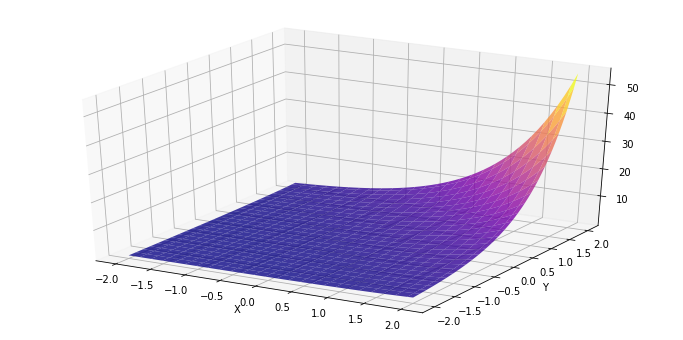

In [71]:
t = np.linspace(-2, 2, 50) 
x , y = np.meshgrid(t,t)

z = np.e**(x+y)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

plt.show()

In [72]:
# ejemplo de funcion continua, derivable pero no diferenciable
x , y = symbols('x y')
f= (x**3 + y**3) / (x**2 + y**2)
f

 3    3
x  + y 
───────
 2    2
x  + y 

In [73]:
# continuidad
r  = symbols('r')
t = Symbol(r'\theta')

f.subs(x,r*cos(t)).subs(y,r*sin(t)).limit(r,0)

0

In [74]:
# derivabilidad
h = symbols('h')
Fx = (f.subs(x, x+h) - f)/(h) 
Limit(Fx,h,0,'+')

     ⎛ 3          3    3    3⎞
     ⎜y  + (h + x)    x  + y ⎟
     ⎜───────────── - ───────⎟
     ⎜ 2          2    2    2⎟
     ⎜y  + (h + x)    x  + y ⎟
 lim ⎜───────────────────────⎟
h─→0⁺⎝           h           ⎠

In [75]:
limit(Fx,h,0,'+')

 4      2  2        3
x  + 3⋅x ⋅y  - 2⋅x⋅y 
─────────────────────
   4      2  2    4  
  x  + 2⋅x ⋅y  + y   

In [76]:
limit(Fx,h,0,'-')

 4      2  2        3
x  + 3⋅x ⋅y  - 2⋅x⋅y 
─────────────────────
   4      2  2    4  
  x  + 2⋅x ⋅y  + y   

In [77]:
# diferenciabilidad 
x0,y0 =0,0

f_x0y0 = f.subs(x,x0).subs(y,y0)  

f_x = f.diff(x).subs(x,x0).subs(y,y0)
f_y = f.diff(y).subs(y,y0).subs(x,x0)

F = (f -f_x0y0 -f_x*(x-x0) -f_y*(y-y0) ) / sqrt((x-x0)**2 + (y-y0)**2)

F

   3    3   
  x  + y    
────────────
         3/2
⎛ 2    2⎞   
⎝x  + y ⎠   

In [78]:
# el limite debe ser 0
F.limit(x,x0).limit(y,y0)

1

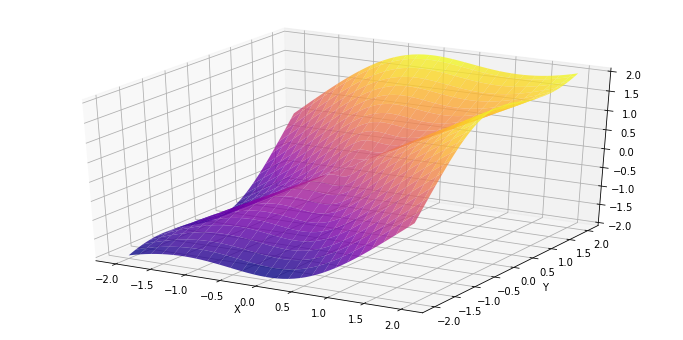

In [79]:
t = np.linspace(-2, 2, 50) 
x , y = np.meshgrid(t,t)

z = (x**3 + y**3) / (x**2 + y**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

plt.show()

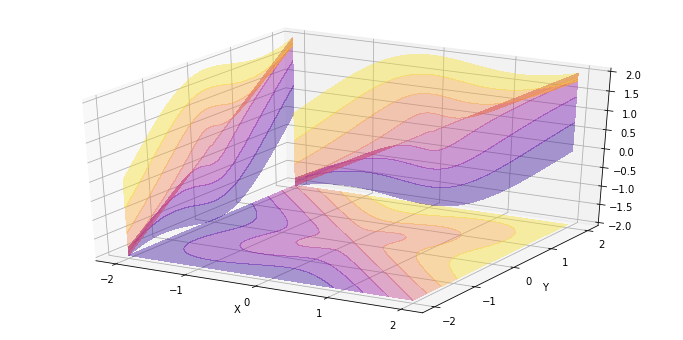

In [80]:
# Proyecciones de la funcion en los planos 

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

# Proy en plano xy
cset = ax.contourf(x, y, z, zdir='z', offset=np.min(z), cmap=cm.plasma, alpha=0.4)

# Proy en plano yz
cset = ax.contourf(x, y, z, zdir='x', offset=min(t), cmap=cm.plasma, alpha=0.4)

# Proy en plano xz
cset = ax.contourf(x, y, z, zdir='y', offset=max(t), cmap=cm.plasma, alpha=0.4)

ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1))
ax.set_yticks(np.arange(min(t),max(t)+1))

plt.show()

# 7. Plano tangente

para una funcion diferneciable $f(x,y) = z$

su diferencial total es $ dz = f'_x (x,y) dx + f'_y (x,y) dy  $

en un punto $(x_o,y_o) $

$ dz = f'_x (x_o,y_o)  dx + f'_y (x_o,y_o)  dy  $ 


Se tiene el plano tangente de una superficie $F(x,y,z)$ en un punto $ X_o =(x_o,y_o,z_o)$  y $X=(x,y,z)$


$ \nabla F(x_o,y_o,z_o) \cdot (X-X_o) =0 $

In [81]:
x , y = symbols('x y')
f = (x**2) + (y**2)
f

 2    2
x  + y 

In [82]:
x0,y0 = 1,1
f.subs(x,x0).subs(y,y0) 

2

In [83]:
# plano tangente por definicion
x0,y0=1,1

fa = f.subs(x,x0).subs(y,y0)
Fx = diff(f,x).subs(x,x-x0).subs(y,y0)
Fy = diff(f,y).subs(x,x0).subs(y,y-y0)

Fx + Fy + fa

2⋅x + 2⋅y - 2

In [84]:
# plano tangente como polinomio de grado 1 
f.series(x, x0=1, n=2).removeO().series(y, x0=1, n=2).removeO()

2⋅x + 2⋅y - 2

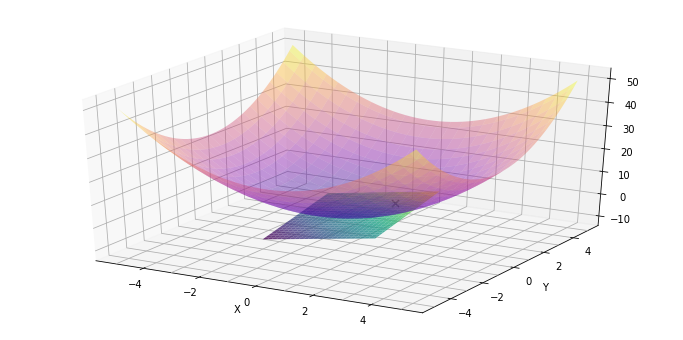

In [85]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

# superficie
t = np.linspace(-5, 5, 50) 
x , y = np.meshgrid(t,t)
z = (x**2) + (y**2) 

surf = ax.plot_surface(x, y, z, rstride=2, cstride=2, cmap=cm.plasma, alpha=0.4)

# plano
t_plano= np.linspace(-2, 2, 50) 
x_plano , y_plano = np.meshgrid(t_plano,t_plano)
z_plano = 2*x_plano + 2*y_plano -2

surf = ax.plot_surface(x_plano, y_plano, z_plano, rstride=2, cstride=2, cmap=cm.viridis, alpha=0.8)

## punto
x0,y0 = 1,1
z0 = (x0**2) + (y0**2) 
ax.scatter( x0, y0 , z0 , c='black', marker='x', s=50)


ax.set_xlabel('X')
ax.set_ylabel('Y')

ax.set_xticks(np.arange(min(t),max(t)+1),2)
ax.set_yticks(np.arange(min(t),max(t)+1),2)

plt.show()

### Espero que les haya sido útil, a mi me hubiese gustado tener una herramienta de este tipo cuando yo cursaba AM o AM2 , por eso quiero difundir este uso de python con numpy y sympy 

### saludos